# 1. Introduction

    Titanic accident was one of the most tragic accident of all time. April 15, 1912, the ship Titanic with more than 2200 passengers bumped into an iceburg and sank causing numerous deaths. Eventhough the accident occured more than 100 years ago, we have to learn from the accident. The 'Titanic dataset' shows the list of passengers abroad on the Titanic and their features including whether they survived or not. In this project, I'd like to investigate this data set to identify 'What factors made people more likely to survive?' or 'Which group of people are more likely to survive?'. These questions can be important because the answers for these question may reflect a important truth of the accidents.


In [1]:
import numpy as np
import pandas as pd

titanic_data = pd.read_csv('titanic_data.csv')
titanic_data_df = pd.DataFrame(titanic_data)
print(titanic_data_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# 2. Overview of the data

•	Take a look into some features of passengers with graph to better understand the big picture. 


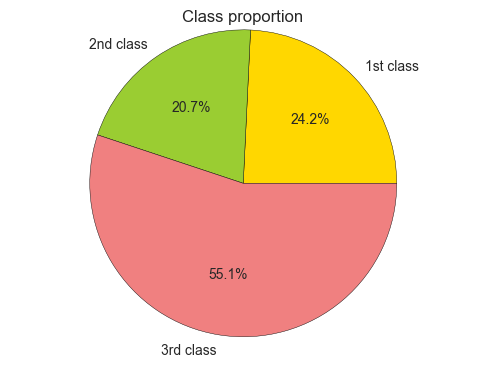

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
labels = '1st class', '2nd class', '3rd class'
sizes = titanic_data_df.groupby('Pclass').count()['PassengerId']
colors = ['gold', 'yellowgreen', 'lightcoral']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=0)
plt.title('Class proportion')
plt.axis('equal')
plt.show()

The class consist of three classes 3rd(55.1%) > 1st(24.2%) > 2nd(20.7%)

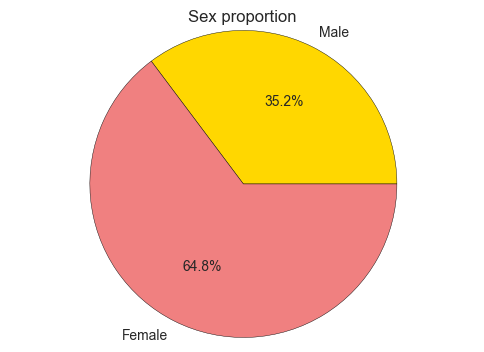

In [3]:
labels = 'Male', 'Female'
sizes = titanic_data_df.groupby('Sex').count()['PassengerId']
colors = ['gold', 'lightcoral']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=0)
plt.title('Sex proportion')
plt.axis('equal')
plt.show()

There are more female(64.8%) than male(35.2%)

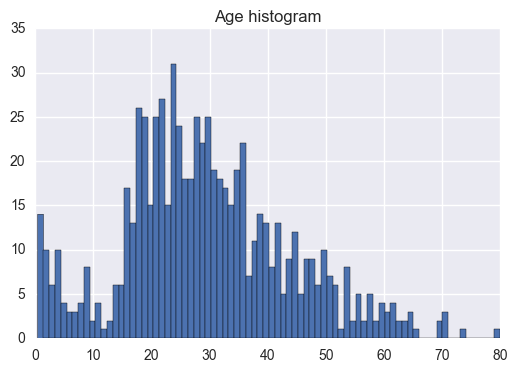

In [4]:
plt.hist(titanic_data_df['Age'].dropna(),80)
plt.title("Age histogram")
plt.show()

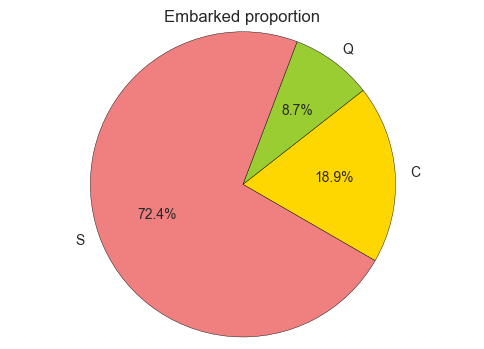

In [5]:
labels = 'C', 'Q', 'S'
sizes = titanic_data_df.groupby('Embarked').count()['PassengerId']
colors = ['gold', 'yellowgreen', 'lightcoral']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=330)
plt.title('Embarked proportion')
plt.axis('equal')
plt.show()

Embarkment consists of three places, S(72.4%) > C(18.9%) > Q(8.7%)

# 3. Cleaning the data

•	Drop the NAN in 'Age'column  
•	Add 'Age_est' to show whether the age was estimated  
•	Separate the age into 4 groups and assign them into 'Age group'  
•	Drop the NAN in 'Embarked' column

In [6]:
#Fill the NAN in 'Age'colum with 0
titanic_data_df['Age'].dropna(0, inplace=True)

#Add 'Age_est' to show whether the age was estimated
def estimate(age):
    return age%1 == 0.5
titanic_data_df['Age_est'] = titanic_data_df['Age'].apply(estimate)

#Make 'Age group'
def group_age(age):
    if age > 60:
        return '6070'
    elif age > 40:
        return '4050'
    elif age > 20:
        return '2030'
    else:
        return '0010'
    
titanic_data_df['Age_group'] = titanic_data_df['Age'].apply(group_age)
#Fill the NAN in 'Embarked'colum with U(for Unknown)
titanic_data_df['Embarked'].dropna(0, inplace=True)


# 4. Analyzing the data  

## 1) Check the relationship between data  

•	Check if there are correlations among variables to reduce the less informative features and select independent ones.

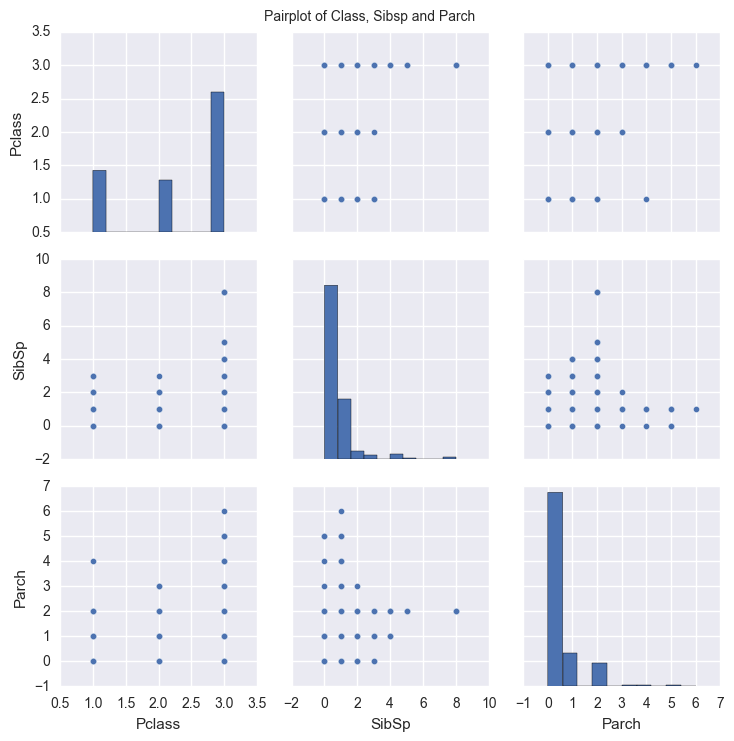

In [7]:
sns.pairplot(titanic_data_df[['Pclass','SibSp','Parch']])
sns.plt.suptitle("Pairplot of Class, Sibsp and Parch")
sns.plt.subplots_adjust(top=0.95)


No particular correlation found among Pclass, Sibsp, and Parch.

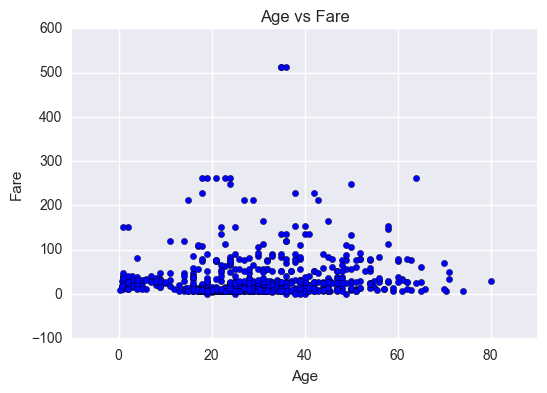

In [8]:
x = titanic_data_df['Age']
y = titanic_data_df['Fare']
plt.scatter(x, y)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

No particular relation found between Age and Fare.

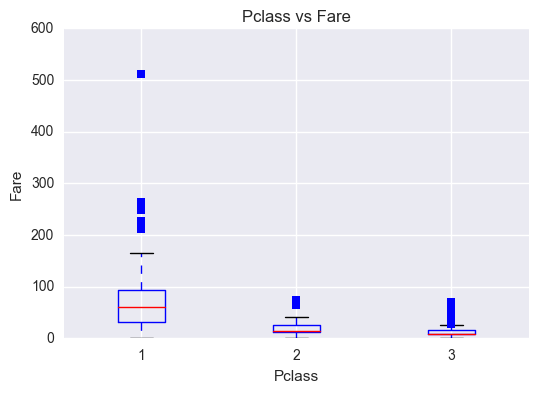

In [9]:
a, b, c = (titanic_data_df.groupby('Pclass')['Fare'])
data = (list(a[1]), list(b[1]), list(c[1]))
plt.boxplot(data, 0, 'rs', 1)
plt.title("Pclass vs Fare")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

Fare tends to be high in order 1st > 2nd > 3rd.

=>	Tentative conclusion: It seems no numerical variables are corrated to each other except Pclass and Fare. Since only one of these variables could contain the information from the two variables, I chose to drop the variable 'Fare' and choose to leave variable 'Pclass'. 

* Among 10 independent variables, I left out 'Fare' for reasons stated above, and left out "Name" and "Ticket" because they are qualitative variables, and I didn't think they can affect the survival rates.  

* First, I tried with 5 numerical personal feature variables, 'Pclass', 'Sex', 'Age_group', 'SibSp', and 'Parch'. Second, I tried to figure out 'Embarked' variable affected the survival rates. Lastly, I convert the 'Cabin' variable to 'Deck' to check if the place of passenger affected the survival rates.


## 2) 1st Approach: Personal Features of People  

* I grouped by 'Pclass', 'Sex', 'Age_group', 'SibSp', and 'Parch' and compared the survival rates by the groups of people  

In [10]:
print("Mean Survival Rate :",titanic_data_df['Survived'].mean())  
print(titanic_data_df.groupby('Pclass').mean()['Survived'])  
print(titanic_data_df.groupby('Sex').mean()['Survived'])  
print(titanic_data_df.groupby('Age_group').mean()['Survived'])  
print(titanic_data_df.groupby('SibSp').mean()['Survived'])  
print(titanic_data_df.groupby('Parch').mean()['Survived'])  


Mean Survival Rate : 0.3838383838383838
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Age_group
0010    0.376404
2030    0.397403
4050    0.390625
6070    0.227273
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


* Some differences were shown, but I couldn't tell which ones are important. So I decided to compare the variance of survival rates among the groups in the each variable. But first, some numbers in Sibsp and Parch seemed unnatural so I analyze these variables by the number of passenger.

In [11]:
print(titanic_data_df.groupby('SibSp').count()['PassengerId'])  
print(titanic_data_df.groupby('Parch').count()['PassengerId'])  

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: PassengerId, dtype: int64


* I excluded the extreme values like 5 and 8 in 'Sibsp' and 4 ~ 6 in parch because they shows too few number of passengers and can ruin the result. And then, I check the variance of the survival rates of each features.

In [12]:
print("Standard deviation of Pclass :",titanic_data_df.groupby('Pclass').mean()['Survived'].std())
print("Standard deviation of Sex :",titanic_data_df.groupby('Sex').mean()['Survived'].std())
print("Standard deviation of Age_group :",titanic_data_df.groupby('Age_group').mean()['Survived'].std())
print("Standard deviation of SibSp :",titanic_data_df.groupby('SibSp').mean()[0:5]['Survived'].std())
print("Standard deviation of Parch :",titanic_data_df.groupby('Parch').mean()[0:4]['Survived'].std())

Standard deviation of Pclass : 0.19479759330588634
Standard deviation of Sex : 0.391122024068098
Standard deviation of Age_group : 0.0809101871489607
Standard deviation of SibSp : 0.15101068983046612
Standard deviation of Parch : 0.11108674402884189


* I discovered that 'Pclass'and 'Sex' are top two variables with the highest variance. I decided to focus on these two variables. And then I wondered if these two variables are related. So I posed hypothesis that 'Pclass' variable is dependent on 'Sex' variable which means there are more women in the first class and 'Pclass' itself don't have effect.  Alternative hypothesis is that 'Pclass' variable is independent from 'Sex'variable which means 'Pclass' and 'Sex' variables have respective effect on survival rates. So I decided to conduct Pairwise comparision(Pclass&Sex) to specify the groups with high survival rates.  

In [13]:
print(titanic_data_df.groupby(['Pclass','Sex']).count()['PassengerId'])
print(94/(94+122))
print(76/(76+108))
print(144/(144+347))

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: PassengerId, dtype: int64
0.4351851851851852
0.41304347826086957
0.29327902240325865


* Although the proportion of female is higher in the 1st class and 2nd class then 3rd class, it seems obscure that class itself affected the survival rates. So I decided to compare the survival rates of all six groups.

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


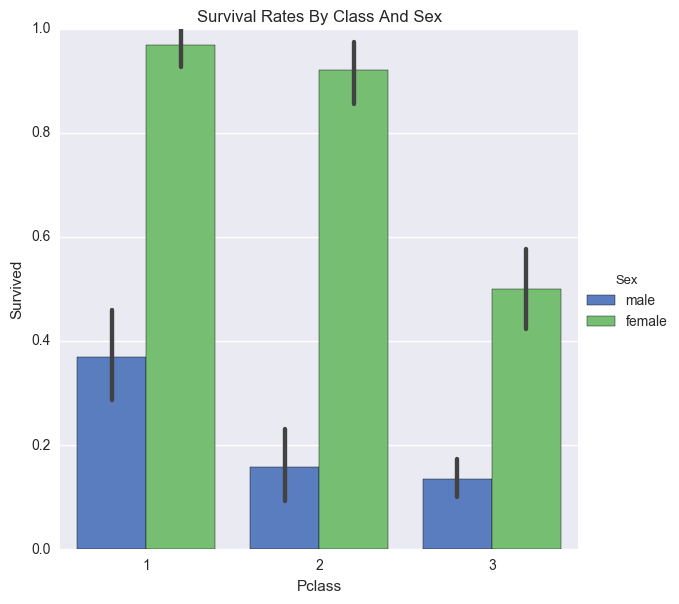

In [14]:
print(titanic_data_df.groupby(['Pclass','Sex']).mean()['Survived'])
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic_data_df,
                   size=6, kind="bar", palette="muted")
sns.plt.title("Survival Rates By Class And Sex")


The plot shows female in 1st(96.8%) and 2nd class(92.1%) have the highest survival rates followed by 3rd class female(50%). Generally male have lower survival rate than female, highest in 1st class(36.8%) followed by 2nd class(15.7%) and 3rd class(13.5) male. From this plot, I tentatively concluded that 'Sex' and 'Pclass' have respective effect on survival rates, but the effects of 'Sex' is much more stronger than 'Pclass'. So I could assume that people considered female first, and then wealth second when they put on the rescue boat.  

## 2) 2nd Approach: Embarkment of people  

* Second approach is to group people by the embarkment place and check the difference in survival rates.

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


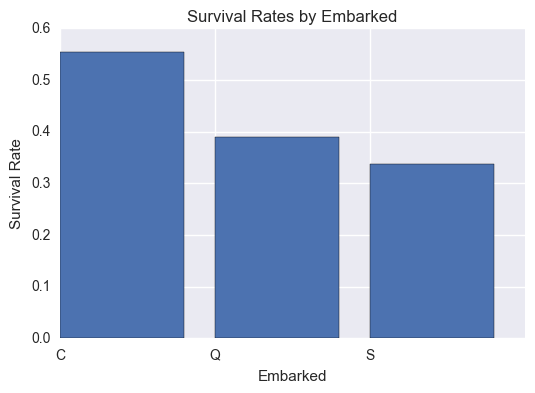

In [15]:
print(titanic_data_df.groupby(['Embarked']).mean()['Survived'])
y = list(titanic_data_df.groupby(['Embarked']).mean()['Survived'])
n = np.arange(len(y))
plt.bar(n, y, tick_label=['C','Q','S'])
plt.title('Survival Rates by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

The survival rates among embarkment places slightly varied C(55.3%) > Q(38.9%) > S(33.6%). From this plot, I posed another hypothesis: the difference could be affected by other variables(Maybe there are more female or 1st class in certain place).

In [16]:
print(titanic_data_df.groupby(['Embarked']).mean()['Pclass'])
print(titanic_data_df.groupby(['Embarked','Sex']).count()['PassengerId'])

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64
Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64


In [17]:
print(73/168)
print(36/77)

0.43452380952380953
0.4675324675324675


* The average of Pclass were lowest in 'C'(1.88) where showed highest survival rates followed by S(2.34) an Q(2.9). The proportion of female between 'C'(73/168=43%) and 'Q'(36/77=46%) seemed not varied compared to survival rates difference. So I tentatively concluded that the survival rates of 'Embarked' are dependent on variable 'Pclass'(there are more wealthy(1st class) people in embarkment with higher survival rates).

## 3) 3rd Approach: Cabin

* Lastly, I posed hypothesis that place(Cabin) of the people may affected survival rates. I sorted the passengers with cabin information by the first letter of the cabin which means deck of the people.

Deck
A    0.583333
B    0.744186
C    0.588235
D    0.741935
E    0.733333
F    0.636364
G    0.500000
T    0.000000
Name: Survived, dtype: float64


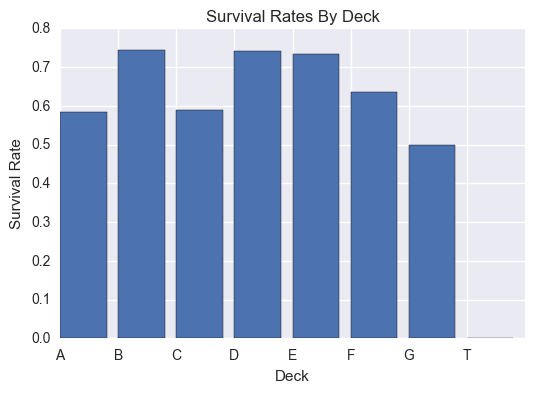

Deck
A    12
B    43
C    51
D    31
E    30
F    11
G     4
T     1
Name: PassengerId, dtype: int64


In [18]:
def get_first_letter(cabin):
    return cabin[0]
titanic_data_df['Deck'] = titanic_data_df.dropna(0)['Cabin'].apply(get_first_letter)
print(titanic_data_df.groupby(['Deck']).mean()['Survived'])
y = list(titanic_data_df.groupby(['Deck']).mean()['Survived'])
n = np.arange(len(y))
plt.bar(n, y, tick_label=['A','B','C','D','E','F','G','T'])
plt.title('Survival Rates By Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()
print(titanic_data_df.groupby(['Deck']).count()['PassengerId'])


=> Tentative conclusion  
* Except the Deck 'G' and 'T' which have too few passengers, survival rates seems not vary depending on the deck of cabins. I would be best to compare the survival rates with the map of the deck and cabin, but the map was unavailable. I tentatively concluded that there are no difference in survival rates among the place(cabin) of passengers.

# 5. Tentative Conclusion

Tentative conclusion from 1st, 2nd, 3rd approach  

1) Female group has higher survival rates than male group. 1st, 2nd class groups has higher survival rates than 3rd class group.  
2) The survival rates of variable 'Embarked' is dependent on the variable 'Pclass' and 'Embarked' didn''t have independent influence. 
3) The place of cabin(deck) seems not affect the survival rates.   

=> The only variables which seemed to affect the survival rates of the people are 'Sex' and 'Pclass'. People seemes like they put female first on the boat, and then rich people on the boat.  

•	Limitation:  
1) Only quntifiable data were dealt.  
2) Not all the combination of data was dealt.  
3) Selection of meaningful feature was rather subjective because no statistical test were made.  
4) Only correlation between variables and survival rate was made, not the causation.  